### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
import tensorflow as tf
#from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(X_train, y_train_num), (X_test, y_test_num) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Change train and test labels into one-hot vectors

In [3]:
y_train = np_utils.to_categorical(y_train_num, 10)
y_train.shape

(60000, 10)

In [4]:
y_test = np_utils.to_categorical(y_test_num, 10)
y_test.shape

(10000, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
# Define model
model1 = Sequential()

In [0]:
# Flatten Imgaes to Vector
model1.add(Reshape((784,), input_shape=(28, 28, 1)))

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
X_train /= 255
X_test /= 255

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
# Layer 1
model1.add(Dense(output_dim=200, init='he_normal', bias=True))
model1.add(Activation("relu"))

In [0]:
# Layer 2
model1.add(Dense(output_dim=100, init='he_normal', bias=True))
model1.add(Activation("relu"))

In [10]:
# Dropout
model1.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [11]:
# Output Layer
model1.add(Dense(output_dim=10, init='he_normal', bias=True))
model1.add(Activation("softmax"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, kernel_initializer="he_normal", use_bias=True)`
  """Entry point for launching an IPython kernel.


In [0]:
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

In [15]:
# Train the model
model1.fit(X_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
           validation_data=(X_test, y_test), callbacks=callback_list, verbose=True)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.6505 - acc: 0.7728 - val_loss: 0.5338 - val_acc: 0.8125
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.5172 - acc: 0.8210 - val_loss: 0.4901 - val_acc: 0.8318
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4970 - acc: 0.8271 - val_loss: 0.4764 - val_acc: 0.8361
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4885 - acc: 0.8298 - val_loss: 0.4820 - val_acc: 0.8280
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.4833 - acc: 0.8308 - val_loss: 0.4720 - val_acc: 0.8363
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4809 - acc: 0.8305 - val_loss: 0.4655 - val_acc: 0.8360
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4764 - acc: 0.8338 - val_loss: 0.4736 - val_ac

In [0]:
# Final validation accuracy is 83.74 %

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [18]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY  = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

In [0]:
trainX /= 255
testX /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20, # random;y rotate images in range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images horizontally (fraction of total height)
    horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(trainX)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

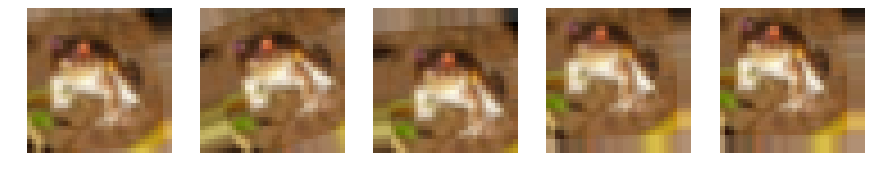

In [35]:
from matplotlib import pyplot as plt
gen = datagen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()